In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay


**A comparison of several classifiers in scikit-learn on synthetic datasets.**

In [51]:
names={
    "Naive Bayes",
    "Logistic Regression",
    "Quadradic Discriminant Analysis",
    "SVM with RBF kernel",
    "Decision Tree",
    "KNN with K=1"
}

List the Classifiers that we are using for the comparison.




In [46]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVM with RBF kernel': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN with K=1': KNeighborsClassifier(n_neighbors=1)
}

Now we are going to define our datasets.

In [ ]:
rng = np.random.RandomState(42)
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
    make_moons(noise=0.3, random_state=2) + make_circles(noise=0.2, factor=0.5, random_state=3)
]

Now we are going to plot.

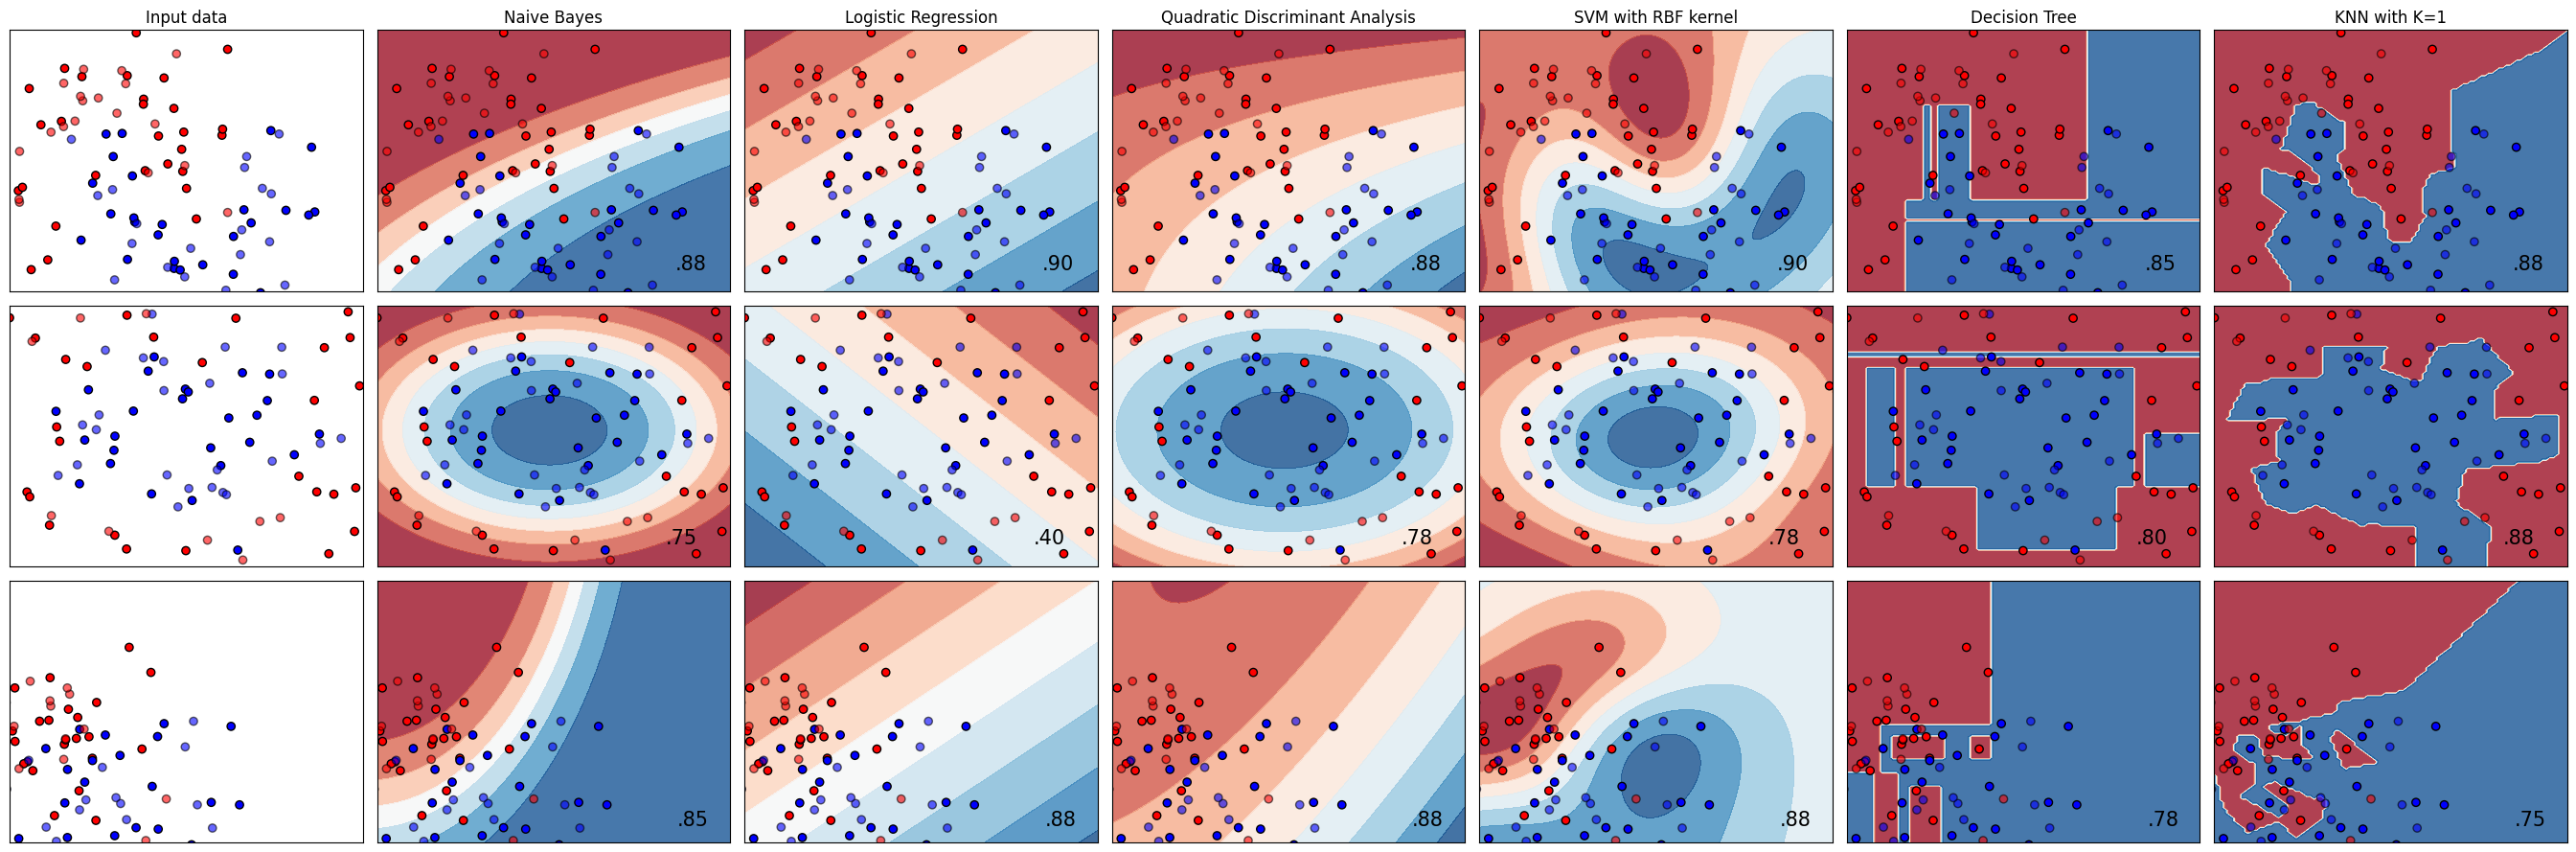

In [63]:
figure = plt.figure(figsize=(27, 9))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    # Scale features
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # First, plot the dataset itself
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title("Input data")
    i += 1

    # Iterate over classifiers
    for name, clf in classifiers.items():
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - .3, y_min + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Particularly in high-dimensional spaces, data can more easily be separated  and the simplicity of classifiers such as naive Bayes and SVMs might lead to better generalization than is achieved by other classifiers. The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

Now we have to create the classification report of each classifier.

**Naive Bayes Classification**


In [64]:
X1, y1 = make_blobs(n_samples=100, centers=2, random_state=42)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X1,y1,test_size=0.4,random_state=42)

In [66]:
model=GaussianNB()

In [67]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [69]:
np.unique(y1)

array([0, 1])

In [70]:
# Generate the classification report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.48      0.72      0.58        18
     class 1       0.62      0.36      0.46        22

    accuracy                           0.53        40
   macro avg       0.55      0.54      0.52        40
weighted avg       0.56      0.53      0.51        40




The classification report shows the performance of a model on a two-class problem. It includes:

Precision: How accurate the model's predictions are for each class. Class 0 has a precision of 0.48, and class 1 has a precision of 0.62.

Recall: The percentage of actual instances of each class that the model correctly identifies. Class 0's recall is 0.72, while class 1's is 0.36.

F1-Score: A balance between precision and recall. Class 0's F1-score is 0.58, and class 1's is 0.46.

Support: The number of actual occurrences of each class in the dataset. There are 18 instances of class 0 and 22 of class 1.

Overall, the model has an accuracy of 0.53, meaning it correctly predicts the class 53% of the time. The report indicates the model performs better at identifying class 0 than class 1, particularly in terms of recall.

Macro Avg: The macro average computes the metric independently for each class and then takes the average. This treats all classes equally, ignoring class imbalance. Here, the macro average for precision, recall, and F1-score are 0.55, 0.54, and 0.52, respectively.

Weighted Avg: The weighted average takes the average of the precision, recall, and F1-score for each class, weighted by the number of instances in each class. This accounts for class imbalance. The weighted averages for precision, recall, and F1-score are 0.56, 0.53, and 0.51, respectively.

**Logistic Regression**

In [75]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(X_test)

In [77]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.39      0.61      0.48        18
     class 1       0.42      0.23      0.29        22

    accuracy                           0.40        40
   macro avg       0.40      0.42      0.39        40
weighted avg       0.41      0.40      0.38        40



Precision is moderately low for both classes (0.39 for class 0 and 0.42 for class 1), indicating that when the model predicts a class, it's correct less than half the time.

Recall is higher for class 0 (0.61) than for class 1 (0.23), meaning the model is better at identifying all instances of class 0 than class 1.

F1-score, which balances precision and recall, is higher for class 0 (0.48) compared to class 1 (0.29), suggesting better overall performance for class 0.

Accuracy of the model is 0.40 (40%), indicating it correctly predicts the class for 40% of the instances across both classes.

Macro and weighted averages show similar trends, indicating the model's performance is fairly balanced between the two classes but overall not highly effective.

In short, the model has some ability to distinguish between the two classes, performing slightly better on class 0 than class 1, but there's significant room for improvement in both precision and recall.

**Quadradic Discriminant Analysis**

In [74]:
QDA=QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [78]:
y_pred = QDA.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.44      0.78      0.56        18
     class 1       0.50      0.18      0.27        22

    accuracy                           0.45        40
   macro avg       0.47      0.48      0.41        40
weighted avg       0.47      0.45      0.40        40



Precision suggests how often the model's predictions for each class are correct, standing at 0.44 for class 0 and 0.50 for class 1. This means the model is slightly more precise in predicting class 1 when it chooses to do so.

Recall indicates the model's ability to identify all instances of each class. For class 0, it's 0.78, showing the model can recognize most of its instances. However, for class 1, the recall is much lower at 0.18, meaning the model misses a lot of class 1 instances.

F1-score combines precision and recall into a single metric, with class 0 at 0.56 and class 1 at 0.27, highlighting that the model performs considerably better on class 0 than class 1 in terms of both precision and recall.

Support shows the actual number of instances for each class in the dataset, useful for understanding the context of the other metrics.
The accuracy of 0.45 (45%) indicates that less than half of all predictions made by the model are correct.

The macro avg for precision, recall, and f1-score suggests an overall performance that is nearly balanced across classes, but not very high.

The weighted avg takes the imbalance in class distribution into account, slightly adjusting the average performance metrics, but it also indicates room for improvement in model performance.

In summary, while the model shows some ability to classify instances correctly, especially for class 0, its overall effectiveness is limited, particularly in correctly identifying instances of class 1.

**SVM  (RBF)**

In [82]:
svm=SVC(kernel='rbf',gamma=0.2)
svm.fit(X_train,y_train)

SVC(gamma=0.2)

In [83]:
y_pred = svm.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.41      0.61      0.49        18
     class 1       0.46      0.27      0.34        22

    accuracy                           0.42        40
   macro avg       0.43      0.44      0.42        40
weighted avg       0.44      0.42      0.41        40



Precision for class 0 is 0.41, indicating that 41% of the model's predictions for class 0 are correct. For class 1, it's slightly higher at 0.46, meaning 46% of class 1 predictions are correct.

Recall for class 0 is 0.61, showing that the model successfully identifies 61% of all actual class 0 instances. Class 1's recall is lower at 0.27, indicating the model identifies 27% of all actual class 1 instances.

F1-score is a harmonic mean of precision and recall. For class 0, it's 0.49, and for class 1, it's 0.34. These scores suggest the model is more balanced towards class 0, performing better in identifying its instances compared to class 1.

Support indicates the number of true instances for each class in the dataset, with 18 for class 0 and 22 for class 1.


The accuracy of the model is 0.42 (42%), indicating that overall, only 42% of all predictions made by the model are correct.

The macro avg of precision, recall, and f1-score is about 0.43, 0.44, and 0.42, respectively, providing a general idea of the model's average performance across classes without considering class imbalance.

The weighted avg considers the imbalance in support between classes, with precision, recall, and f1-score averages slightly adjusted to 0.44, 0.42, and 0.41, respectively.

In summary, the model shows a moderate ability to distinguish between the two classes, with a notable bias towards better identifying instances of class 0. There's considerable room for improvement, especially in increasing the recall for class 1.

**Decision Tree**

In [87]:
tree_model=DecisionTreeClassifier(criterion='gini',max_depth=4)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [88]:
y_pred = tree_model.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.45      0.28      0.34        18
     class 1       0.55      0.73      0.63        22

    accuracy                           0.53        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.51      0.53      0.50        40



Precision for class 0 is 0.45, meaning 45% of the model's class 0 predictions are correct. For class 1, the precision is higher at 0.55, indicating a better rate of correct predictions for this class.

Recall for class 0 is 0.28, showing that the model identifies only 28% of all actual class 0 instances. Class 1 has a recall of 0.73, suggesting the model is quite effective at identifying class 1 instances.

F1-score combines precision and recall into a single measure. For class 0, it's 0.34, and for class 1, it's significantly higher at 0.63, indicating a better balance of precision and recall for class 1.

Support is the number of actual occurrences of each class in the dataset, providing context for the other metrics.

The accuracy of 0.53 (53%) signifies that slightly over half of the model's predictions are correct across both classes.

Macro avg and weighted avg show an overall balanced performance between precision, recall, and f1-score across the classes, with a slight edge towards class 1 in terms of precision and significantly better recall, leading to a higher f1-score.

In summary, the model performs better at identifying and correctly predicting instances of class 1 compared to class 0. The overall accuracy suggests that the model is moderately effective, with room for improvement, especially in recognizing class 0 instances.

**KNN with K = 1**

In [90]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [91]:
y_pred = knn.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.32      0.33      0.32        18
     class 1       0.43      0.41      0.42        22

    accuracy                           0.38        40
   macro avg       0.37      0.37      0.37        40
weighted avg       0.38      0.38      0.38        40



Precision for each class is the ratio of correctly predicted positive observations to the total predicted positives for that class. Class 0 has a precision of 0.32, and Class 1 has a precision of 0.43, meaning Class 1's predictions are more accurate.

Recall for each class is the ratio of correctly predicted positive observations to all observations in the actual class. Class 0 has a recall of 0.33, and Class 1 has a recall of 0.41, indicating that the model is slightly better at detecting Class 1 instances.

F1-score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. For Class 0, it's 0.32, and for Class 1, it's 0.42, suggesting the model's predictive quality is better for Class 1.

Support is the actual number of occurrences of each class in the specified dataset. There are 18 instances of Class 0 and 22 instances of Class 1.

The accuracy of the model is 0.38, meaning it correctly predicts 38% of all classes.

Macro avg of precision, recall, and f1-score gives equal weight to each class, which is useful for imbalanced classes. Here, it's 0.37 for both precision and recall, and also for the f1-score.

Weighted avg calculates metrics for each class according to their support and then averages them. For precision, recall, and f1-score, it's around 0.38, taking into account the imbalance in class distribution.

**Conclusion**

We compared different classification models. When we consider the accuracy from the classification report, Naive Bayes Classification and Decision Tree are better than the other models. However, for a more comprehensive decision, we would need to consider the importance of precision, recall, f1-score, and perhaps even the class distribution reflected in the support numbers.





